In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.spatial import distance

In [2]:
n=400
u1=pd.DataFrame(np.random.uniform(low=-1,high=1,size=(n,5)))
y1=pd.DataFrame([0]*n,columns=['labels'])
s1=pd.concat([u1,y1],axis=1)
u2=pd.DataFrame(np.random.uniform(low=2,high=3,size=(n,5)))
y2=pd.DataFrame([1]*n,columns=['labels'])
s2=pd.concat([u2,y2],axis=1)
u3=pd.DataFrame(np.random.uniform(low=5,high=7,size=(n,5)))
y3=pd.DataFrame([2]*n,columns=['labels'])
s3=pd.concat([u3,y3],axis=1)
u4=pd.DataFrame(np.random.uniform(low=8,high=10,size=(n,5)))
y4=pd.DataFrame([3]*n,columns=['labels'])
s4=pd.concat([u4,y4],axis=1)
u5=pd.DataFrame(np.random.uniform(low=-3,high=-5,size=(n,5)))
y5=pd.DataFrame([4]*n,columns=['labels'])
s5=pd.concat([u5,y5],axis=1)
S=pd.concat([s1,s2,s3,s4,s5],axis=0)
S.head()

,0,1,2,3,4,labels
0,0.924631,0.484127,-0.806631,-0.919322,0.640763,0
1,0.345025,0.323603,0.538581,-0.602016,-0.086639,0
2,-0.778422,0.797468,0.141752,0.004864,0.825782,0
3,-0.562387,0.004666,0.390439,-0.754034,0.718135,0
4,-0.372022,-0.572595,0.024634,0.070615,0.967564,0


In [3]:
X=S.iloc[:,0:5]
Y=S.iloc[:,-1]

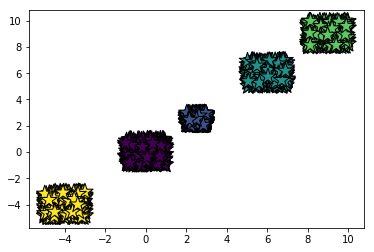

In [4]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='*', c=Y,
            s=300, edgecolor='k',)

In [38]:
x=X.iloc[0:20:,1];y=X.iloc[0:20:,3]

In [24]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [32]:
# md=MahalanobisDist(x,y)
# md


In [211]:
MD=distance.cdist(X,X,'mahalanobis')
np.diag(MD)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

0.32360304200228507

In [169]:
len(X[0:,1])

87

In [86]:
import math
def Euclidean_distance(x,y):
    for i in range(len(x)):
        sd = 0
        sd +=(x[i]-y[i])**2
        ed = np.sqrt(sd)
    return ed

In [167]:
dist = np.linalg.norm(X[1]-X[2])
dist

0.6721589738560456

In [89]:
# import math
# def Euclidean_distance(feat_one, feat_two):

#     squared_distance = 0

#     #Assuming correct input to the function where the lengths of two features are the same

#     for i in range(len(feat_one)):

#             squared_distance += (feat_one[i]-feat_two[i])**2

#     ed = np.sqrt(squared_distances)

#     return ed

In [90]:
Euclidean_distance(x, y)

0.04156853812292094

In [218]:
df=pd.read_csv('ipl.csv')

X=df.values
print type(df)
# Euclidean_distance(X[:,0],X[:,1])

<class 'pandas.core.frame.DataFrame'>


In [213]:
colors = 10*["g","r","c","b","k"]
class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]
            #print self.centroids

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                #print featureset.shape
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                #print self.centroids[centroid]
                #distances = [distance.cdist(featureset,self.centroids[centroid],'mahalanobis') for centroid in self.centroids]
                #print distances
                #distances=np.diag(distances)
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        #distances = [distance.cdist(featureset,self.centroids[centroid],'mahalanobis')for centroid in self.centroids]
        #distances=np.diag(distances)
        classification = distances.index(min(distances))
        return classification

0
1
2
3
4


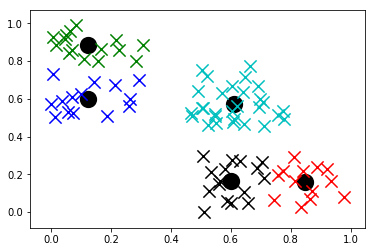

In [227]:
clf = K_Means()
clf.fit(X)
a=[];
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)  
plt.show()

In [180]:
from scipy.spatial.distance import cdist
results =  cdist(X,X,'mahalanobis')
results = np.diag(results)
results

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [228]:
dist = np.linalg.norm(X-X)
dist

0.0

In [229]:
clf = K_Means()
clf.fit(X)

correct = 0
for i in range(len(X)):

    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y[i]:
        correct += 1


print(correct/len(X))

KeyError: 20